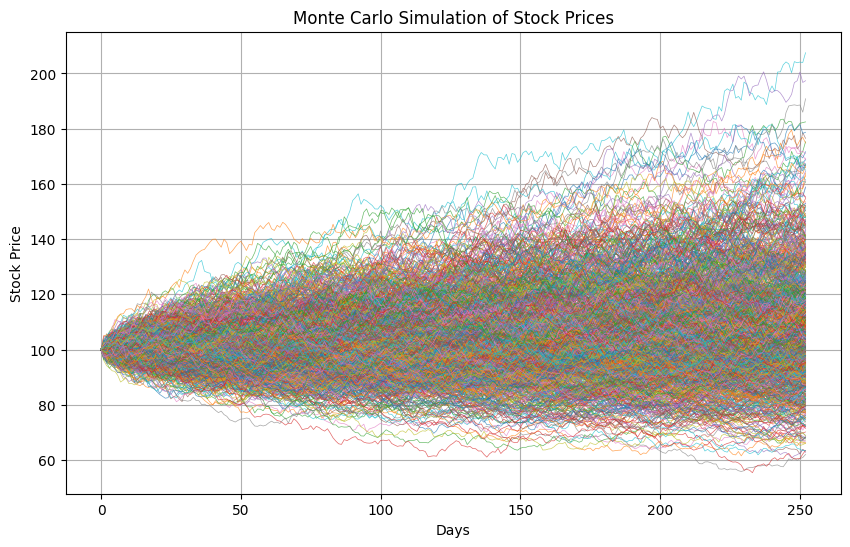

Mean Final Price: $109.46
Median Final Price: $107.29
5% Value at Risk (VaR): $77.81
Probability of Loss: 36.40%


In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100         # Initial stock price
T = 1.0          # Time horizon (1 year)
N = 252          # Number of time steps (trading days in a year)
M = 1000         # Number of simulations
mu = 0.08        # Expected annual return (drift)
sigma = 0.2      # Volatility (standard deviation)

# Time increment
dt = T / N

# Simulate M paths
paths = np.zeros((N + 1, M))
paths[0] = S0  # Starting price for all simulations

# Generate random Brownian motion
for t in range(1, N + 1):
    Z = np.random.normal(0, 1, M)  # Random values from standard normal distribution
    paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Plot simulated paths
plt.figure(figsize=(10, 6))
plt.plot(paths, lw=0.5, alpha=0.7)
plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Analyzing Results
final_prices = paths[-1]
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
var_95 = np.percentile(final_prices, 5)  # 5% Value at Risk (VaR)
prob_loss = np.mean(final_prices < S0)   # Probability of ending below starting price

print(f"Mean Final Price: ${mean_price:.2f}")
print(f"Median Final Price: ${median_price:.2f}")
print(f"5% Value at Risk (VaR): ${var_95:.2f}")
print(f"Probability of Loss: {prob_loss:.2%}")

# %%
